In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\alish\Downloads\archive (1)\Housing.csv")

# Basic inspection
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())


Shape of dataset: (20640, 10)

Column names:
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

First 5 rows:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3   

In [2]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum().sort_values(ascending=False).head(20))

# Data types
print("\nData types:\n", df.dtypes.value_counts())

# Number of unique values
print("\nUnique values per column:\n", df.nunique().sort_values(ascending=False).head(20))



Missing values:
 total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Data types:
 float64    9
object     1
Name: count, dtype: int64

Unique values per column:
 median_income         12928
total_rooms            5926
population             3888
median_house_value     3842
total_bedrooms         1923
households             1815
latitude                862
longitude               844
housing_median_age       52
ocean_proximity           5
dtype: int64


In [5]:
# Fill missing values in 'total_bedrooms' with its median
df.loc[:, 'total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())


In [7]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)


In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
corr = df.corr()


In [13]:
corr.shape

(13, 13)

<Axes: >

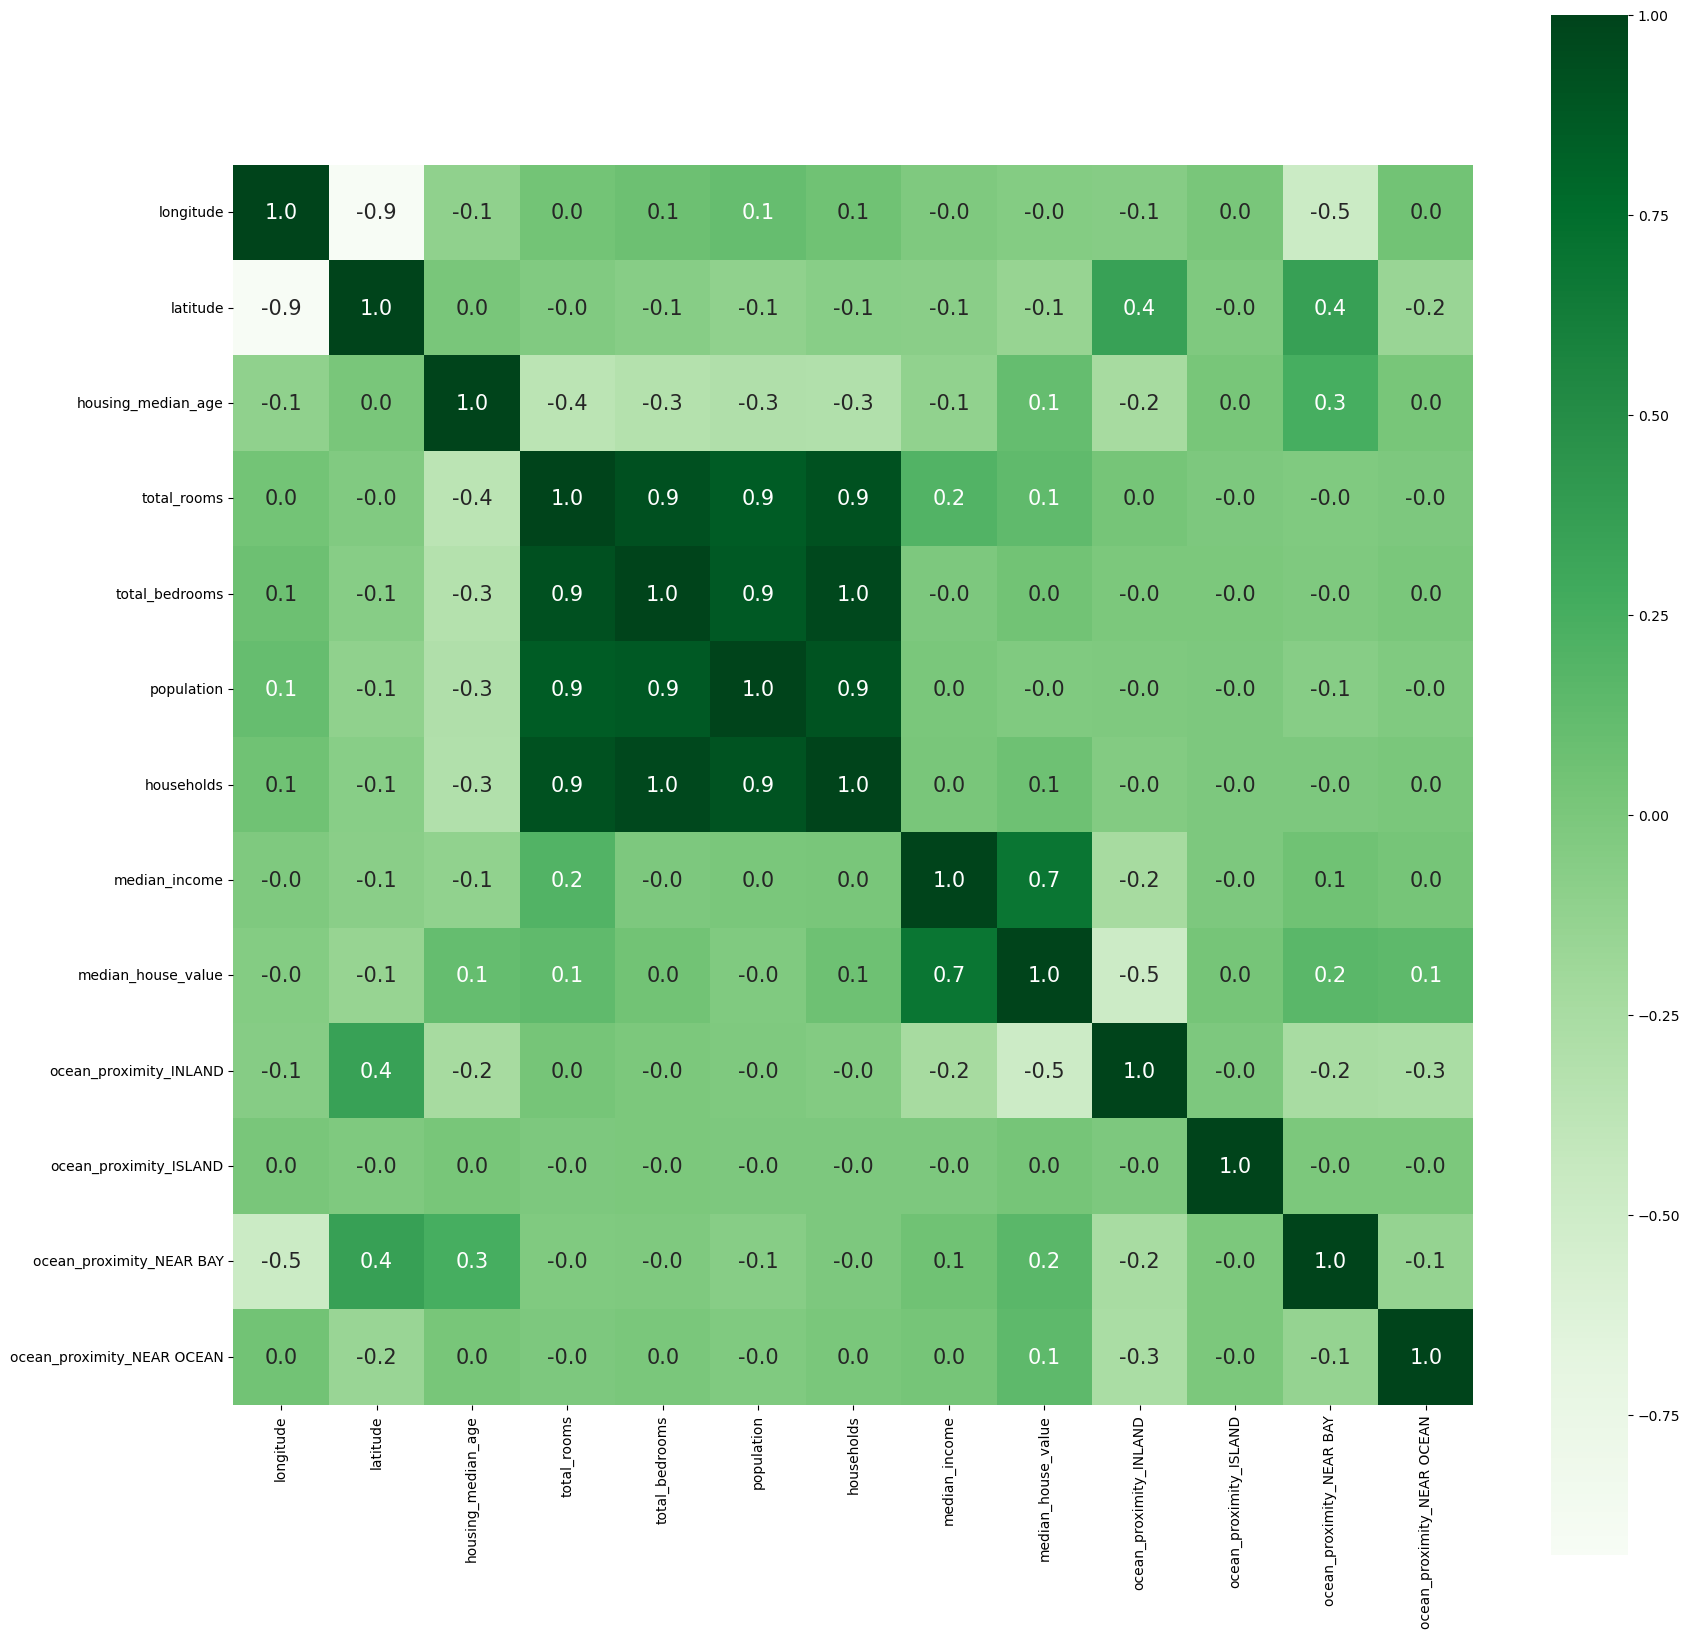

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
corr = df.corr()
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')



In [16]:
#  Define features and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

#  Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
#  Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training set size: (16512, 12)
Test set size: (4128, 12)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)


Linear Regression Results:
Mean Squared Error (MSE): 4908476721.156614
R2 Score: 0.6254240620553607


In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Define parameter grid
params = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Perform Grid Search with 5-fold CV
grid = GridSearchCV(Ridge(), param_grid=params, scoring='r2', cv=5)
grid.fit(X_train_scaled, y_train)

# Get best alpha
best_alpha = grid.best_params_['alpha']
print("Best Ridge alpha:", best_alpha)

# Train Ridge model with best alpha
model_ridge = Ridge(alpha=best_alpha)
model_ridge.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_ridge = model_ridge.predict(X_test_scaled)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

print("Ridge Regression R2 Score:", ridge_r2)
print("Ridge Regression MSE:", ridge_mse)


Best Ridge alpha: 10.0
Ridge Regression R2 Score: 0.625736407111039
Ridge Regression MSE: 4904383723.503915


In [23]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Define hyperparameter grid
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

#  GridSearchCV for hyperparameter tuning
grid_dt = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid_dt,
    scoring='r2',
    cv=5
)

# Fit to training data
grid_dt.fit(X_train_scaled, y_train)

#  Get best model and parameters
best_dt = grid_dt.best_estimator_
print("Best Decision Tree Parameters:", grid_dt.best_params_)

# Predict and evaluate on test data
y_pred_dt = best_dt.predict(X_test_scaled)
dt_r2 = r2_score(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)

print("Decision Tree R2 Score:", dt_r2)
print("Decision Tree MSE:", dt_mse)


Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_split': 10}
Decision Tree R2 Score: 0.7160745877415269
Decision Tree MSE: 3720584093.742521


In [24]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

#  Initialize GridSearchCV with Random Forest
grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    scoring='r2',
    cv=5,
    n_jobs=-1  # Use all cores to speed up
)

#  Fit the model to the training data
grid_rf.fit(X_train_scaled, y_train)

# Step 5: Get best model and parameters
best_rf = grid_rf.best_estimator_
print("Best Random Forest Parameters:", grid_rf.best_params_)

#  Make predictions and evaluate the model
y_pred_rf = best_rf.predict(X_test_scaled)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

print("Random Forest R2 Score:", rf_r2)
print("Random Forest MSE:", rf_mse)


Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest R2 Score: 0.8181935027640088
Random Forest MSE: 2382408662.8057218


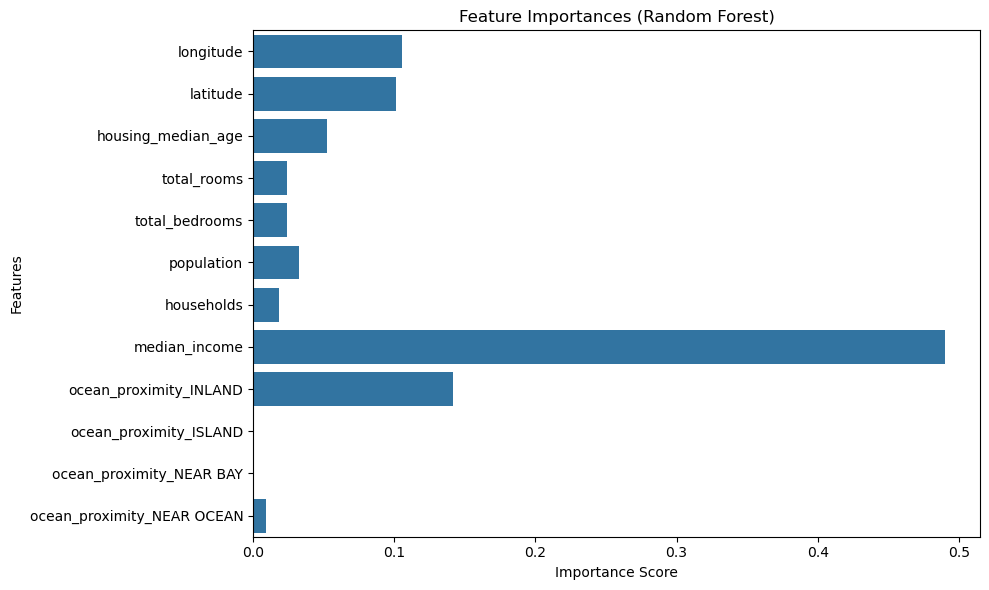

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importances = best_rf.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [27]:

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Define parameter grid for SVR
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto']
}

#  Initialize GridSearchCV with SVR (RBF kernel)
grid_svr = GridSearchCV(
    estimator=SVR(kernel='rbf'),
    param_grid=param_grid_svr,
    scoring='r2',
    cv=3,
    n_jobs=-1
)

#  Fit the model to the training data
grid_svr.fit(X_train_scaled, y_train)

# Get best model and parameters
best_svr = grid_svr.best_estimator_
print("Best SVR Parameters:", grid_svr.best_params_)

#  Make predictions and evaluate the model
y_pred_svr = best_svr.predict(X_test_scaled)
svr_r2 = r2_score(y_test, y_pred_svr)
svr_mse = mean_squared_error(y_test, y_pred_svr)

print("SVR R2 Score:", svr_r2)
print("SVR MSE:", svr_mse)


Best SVR Parameters: {'C': 100, 'epsilon': 0.01, 'gamma': 'auto'}
SVR R2 Score: 0.33602086256033237
SVR MSE: 8700842230.655888


In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 → Manhattan distance, p=2 → Euclidean
}
grid_knn = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid_knn,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

grid_knn.fit(X_train_scaled, y_train)
best_knn = grid_knn.best_estimator_
print("Best KNN Parameters:", grid_knn.best_params_)

y_pred_knn = best_knn.predict(X_test_scaled)

knn_r2 = r2_score(y_test, y_pred_knn)
knn_mse = mean_squared_error(y_test, y_pred_knn)

print("KNN R2 Score:", knn_r2)
print("KNN MSE:", knn_mse)



Best KNN Parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
KNN R2 Score: 0.7418883205143182
KNN MSE: 3382318621.8687487


Model Performance Comparison (California Dataset):
               Model  Test R2 Score      Test MSE
0  Linear Regression       0.625424  4.908477e+09
1   Ridge Regression       0.625736  4.904384e+09
2      Decision Tree       0.716075  3.720584e+09
3      Random Forest       0.818194  2.382409e+09
4          SVR (RBF)       0.336021  8.700842e+09
5                KNN       0.741888  3.382319e+09


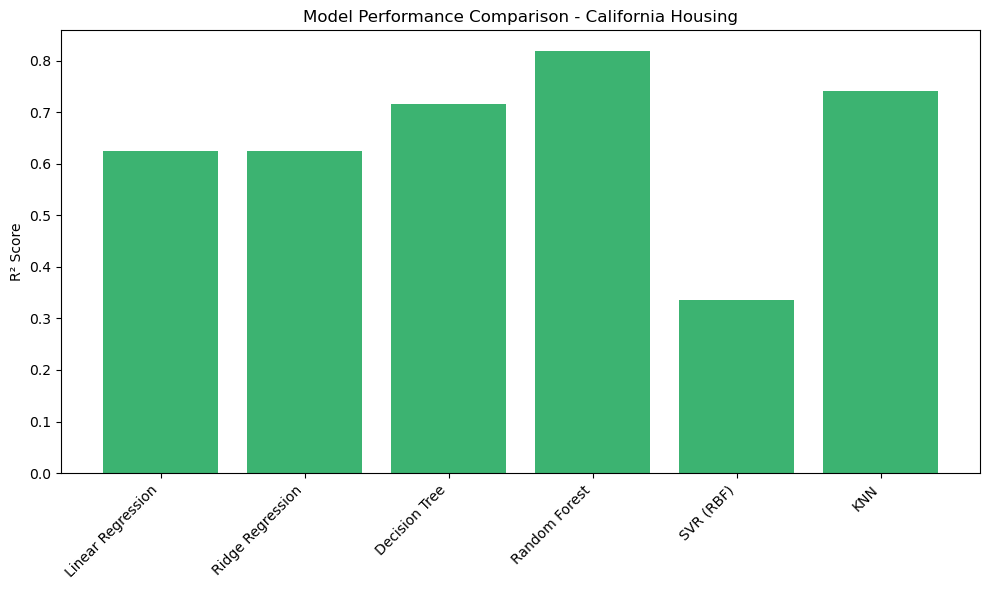

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Models evaluated
all_models = [
    "Linear Regression",
    "Ridge Regression",
    "Decision Tree",
    "Random Forest",
    "SVR (RBF)",
    "KNN"
]

# Replace  actual R2 and MSE values
r2_scores = [
    r2,              
    ridge_r2,       
    dt_r2,          
    rf_r2,          
    svr_r2,          
    knn_r2          
]

mse_scores = [
    mse,            
    ridge_mse,     
    dt_mse, 
    rf_mse,          
    svr_mse,         
    knn_mse          
]

# Create and display DataFrame
performance_df = pd.DataFrame({
    "Model": all_models,
    "Test R2 Score": r2_scores,
    "Test MSE": mse_scores
})

print("Model Performance Comparison (California Dataset):")
print(performance_df)

# Bar Plot for R² Score
plt.figure(figsize=(10, 6))
plt.bar(performance_df["Model"], performance_df["Test R2 Score"], color='mediumseagreen')
plt.xticks(rotation=45, ha='right')
plt.ylabel("R² Score")
plt.title("Model Performance Comparison - California Housing")
plt.tight_layout()
plt.show()


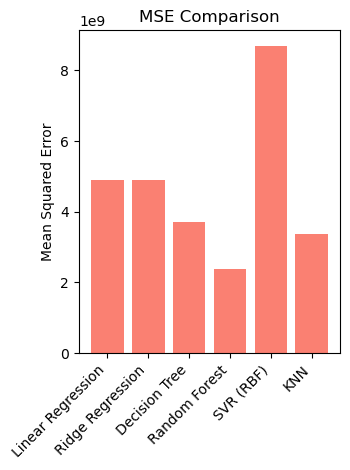

In [30]:
# MSE Plot
plt.subplot(1, 2, 2)
plt.bar(all_models, mse_scores, color='salmon')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Mean Squared Error")
plt.title("MSE Comparison")

plt.tight_layout()
plt.show()
